<a href="https://colab.research.google.com/github/Santhoshi2003/Technohack_Internship/blob/main/house_predection(techohack).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
def correlation(x,y):
  import math
  from statistics import mean
  from statistics import pstdev

  x_minus_xbar= []
  for i in x:
    x_minus_xbar.append(i-mean(x))

  y_minus_ybar= []
  for i in y:
    y_minus_ybar.append(i-mean(y))

  stdevx=pstdev(x)
  stdevy=pstdev(y)

  product=[]
  for i in range(len(x_minus_xbar)):
    product.append(x_minus_xbar[i]*y_minus_ybar[i])

  sumOfproducts=sum(product)

  correlation=sumOfproducts/(stdevx*stdevy*len(x))

  print(correlation)
  print("x        y        x-xbar     y-ybar    (x-xbar)(y-ybar)")
  for i in range (len(x)):
    print(x[i], y[i], x_minus_xbar[i], y_minus_ybar[i], product[i],sep="        " )
  return(correlation)

print(correlation([1,2,3,4],[9,8,6,5]))


-0.9899494936611664
x        y        x-xbar     y-ybar    (x-xbar)(y-ybar)
1        9        -1.5        2        -3.0
2        8        -0.5        1        -0.5
3        6        0.5        -1        -0.5
4        5        1.5        -2        -3.0
-0.9899494936611664


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
data = pd.read_csv("/content/house price.csv")
data.shape

(4600, 18)

In [4]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [5]:
data['price'].describe()

count    4.600000e+03
mean     5.519630e+05
std      5.638347e+05
min      0.000000e+00
25%      3.228750e+05
50%      4.609435e+05
75%      6.549625e+05
max      2.659000e+07
Name: price, dtype: float64

<Axes: ylabel='Frequency'>

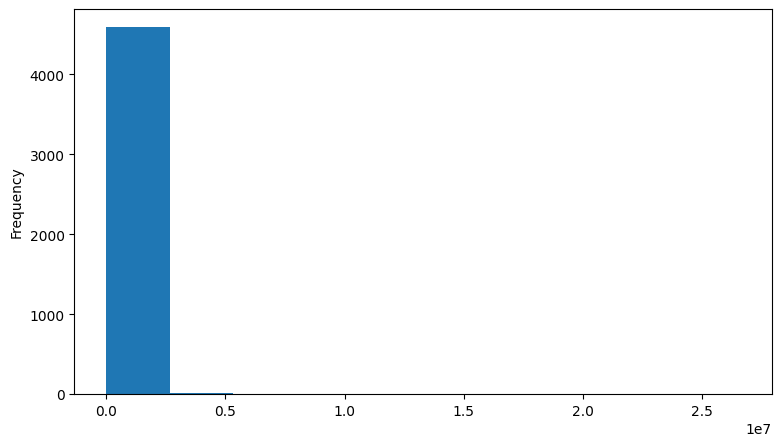

In [6]:
plt.figure(figsize = (9, 5))
data['price'].plot(kind ="hist")

<ipython-input-7-13fc152d6271>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


<Axes: >

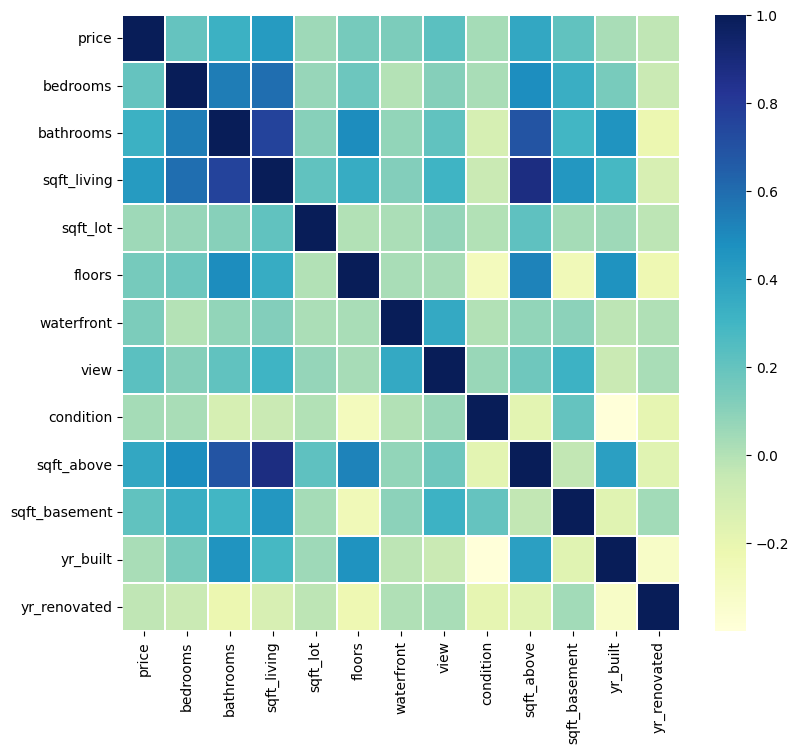

In [7]:
corrmat = data.corr()

f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1,annot=False)